In [4]:
#spline graphs
import numpy as np
import yt
import time
from yt.funcs import mylog
import matplotlib.pyplot as plt
mylog.setLevel(40) #prevents warning
plt.style.use('default')
import scipy
from scipy import optimize
from scipy.interpolate import UnivariateSpline
import warnings
from scipy.signal import savgol_filter


In [5]:
#only cell in need of changing between runs
inputfile = ('/scratch/jak491/npz_storage/covering_grid_den0.npz','/scratch/jak491/npz_storage/covering_grid_den1.npz','/scratch/jak491/npz_storage/covering_grid_den2.npz', '/scratch/jak491/npz_storage/covering_grid_den3.npz', '/scratch/jak491/npz_storage/covering_grid_den4.npz', '/scratch/jak491/npz_storage/covering_grid_den5.npz', '/scratch/jak491/npz_storage/covering_grid_den_high.npz')
percent = 3
perc = '3'
titles = ('gravity ', 'turbulence','magnetic fields', 'all + outflows')
#titles = ('10% SFE\nG','10% SFE\nG+T','10% SFE\nG+T+M','6% SFE\nG+T+M+P' )


In [6]:
#plot setup
d = {}
variable_name =('density_g','density_gt','density_gtm', 'density_gtmp')
input_file = inputfile[percent]
plot_data = np.load(input_file, allow_pickle=True)

starting
0
1
2
3


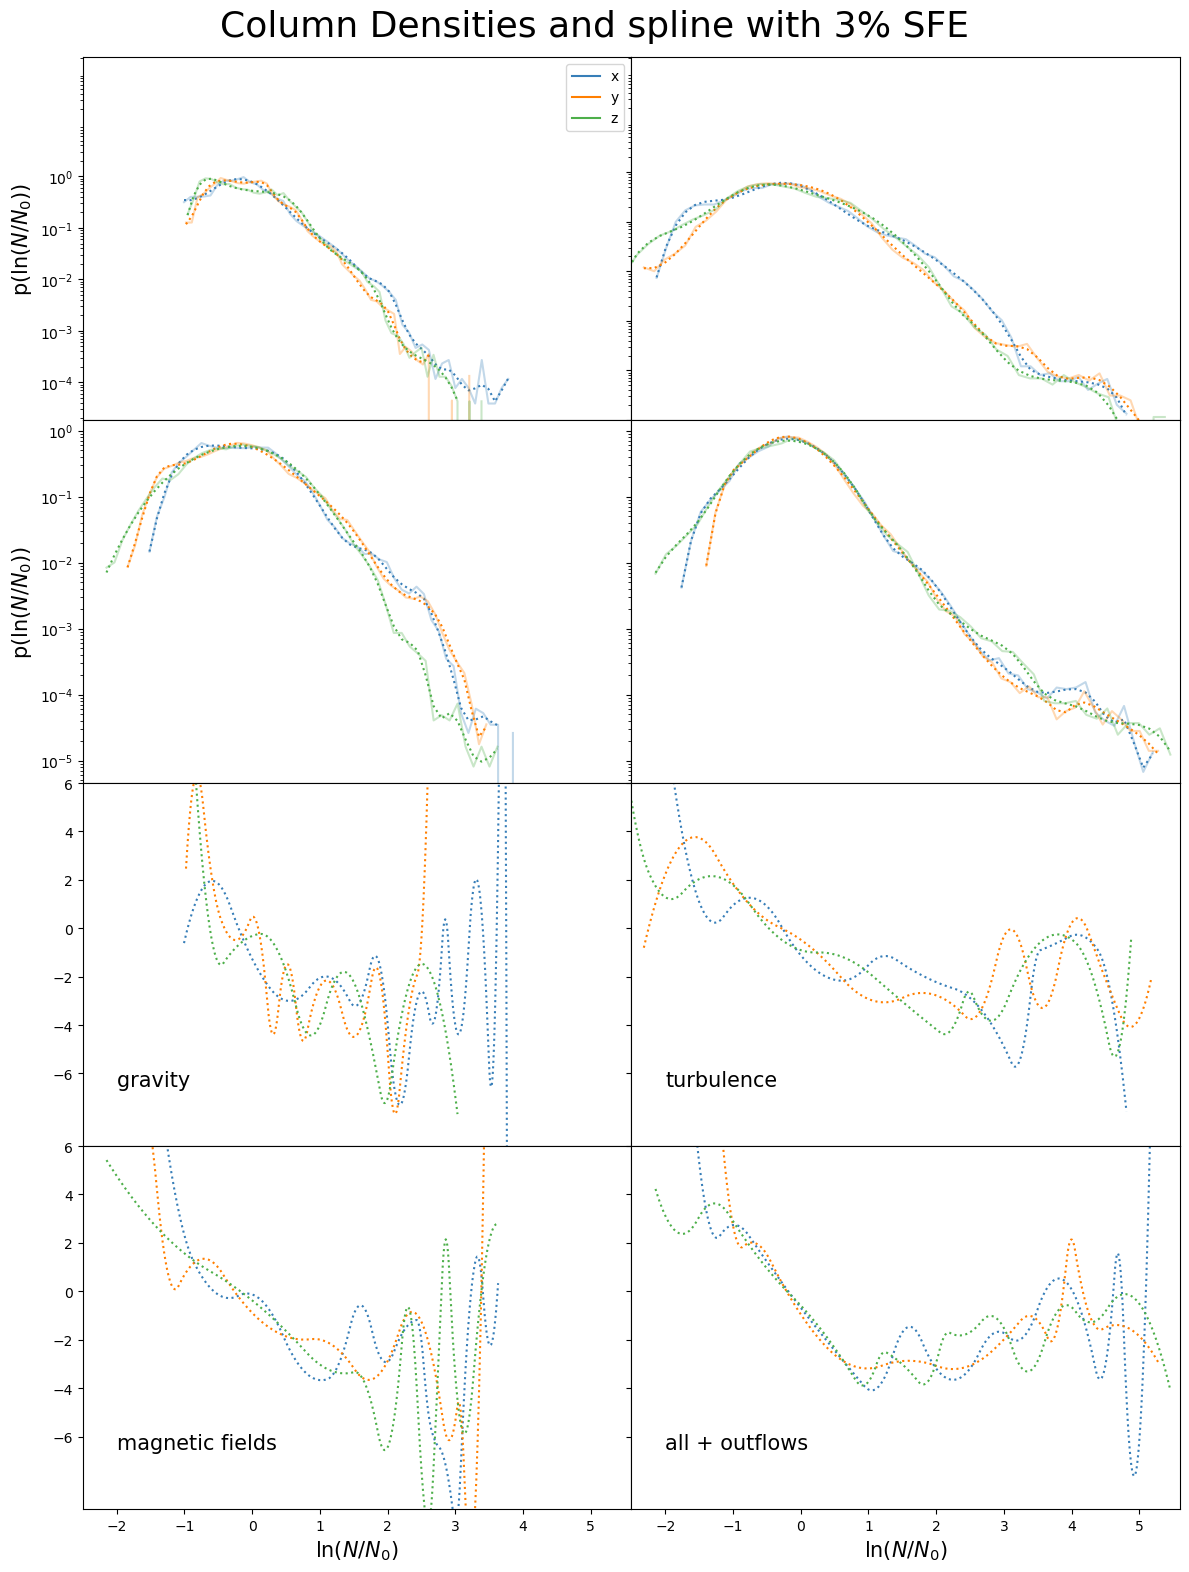

time: 1.4693666179974874


In [10]:
#main processing cell.
warnings.filterwarnings('ignore')


start = time.time()
print('starting')
spline_slope = []
slopes = []
error = []
color_list = ('#377eb8', '#ff7f00', '#4daf4a')#('b', 'r', 'green')
fig, ax = plt.subplots(nrows=4,ncols=2,figsize=(12,16), sharex = 'all', sharey = 'row', gridspec_kw={'hspace': 0,'wspace':0})
ax =ax.ravel()
plt.suptitle('Column Densities and spline with ' + perc + '% SFE', size =26)
b = 0
ax[0].plot(100,100, color = color_list[0], alpha =1)
ax[0].plot(100,100, color = color_list[1], alpha =1)
ax[0].plot(100,100, color = color_list[2], alpha =1)

legend1 = ax[0].legend([ 'x', 'y', 'z'], loc = 'upper right')

#leg4 =ax[0].plot(100,100, color = 'black', alpha =.3)
#leg5 =ax[0].plot(100,100, color = 'black', alpha =1, linestyle = ':')
#legend2 = ax[0].legend([leg4,leg5],['column density','spline fit'], loc = 'lower right')
#ax[0].add_artist(legend1)

for n in range(4):
    den = plot_data[plot_data.files[n]]
    color_list = ('#377eb8', '#ff7f00', '#4daf4a')#('b', 'r', 'green')
    print(n)     #for time keeping
    
    for a in (range(3)):
        xx =[]
        y = []
        spline = []

        log_den_d = plot_data[plot_data.files[4+b]]
        counts_d, binS_d = np.histogram(log_den_d,bins=50, density= True)
        b = b+1
        
        bin_list = []
        for i in range(len(binS_d)-1):
            bin_i=(binS_d[i]+binS_d[i+1])/2
            bin_list.append(bin_i)

        for i in range(len(bin_list)):
            
            if counts_d[i] > 0:
                    xx.append(bin_list[i])
                    y.append(counts_d[i])
            else:
                break
        x = np.linspace(min(xx), max(xx), 500)
        counts_filtered = savgol_filter(np.log(y), 5, 3)

        spl = UnivariateSpline(xx, counts_filtered, k = 3, s = .3)
        pdf_density_fit = x
        pdf_counts_fit = np.exp(spl(x))
        ax[n].plot(bin_list, counts_d, color = color_list[a], alpha = .3)
        ax[n].plot(xx, np.exp(spl(xx)), label = 'fit', color =color_list[a], linestyle = ':')
        
        deriv = spl.derivative(1)
        pdf_counts_deriv = deriv(x)
        ax[n+4].plot(x, deriv(x), label = 'fit',color =color_list[a], linestyle = ':')
        
        #recording spline slope
        z=0
        for zz in x:
            if zz > 1:
                if zz < 2:
                    spline.append(pdf_counts_deriv[z])
            z = z+1
        spline_slope.append(sum(spline)/len(spline))


        
    if n > 1:
        ax[n+4].set_xlabel(r'ln($N/N_0$)', size=15)
    if n == 0 or n == 2:
        ax[n].set_ylabel(r'p(ln($N/N_0$))', size=15)
    
  #  if n == 0 or n == 2:
  #     ax[n+4].set_ylabel(r'p(ln($N/N_0$))', size=15)
    

    ax[n].annotate(titles[n],[-2,10**(-5.5)], size =15)
    ax[n+4].annotate(titles[n],[-2,-6.5], size =15)
    ax[n].set_yscale('log')
    #ax[n].set_ylim(10**(-6),1)
    #ax[n].set_xlim(-3,6)
    ax[n].set_yticks((1e0,1e-1,1e-2,1e-3,1e-4,1e-5))
    ax[n+4].set_yscale('linear')
    ax[n+4].set_ylim(-9,6)
    ax[n+4].set_xlim(-2.5,5.6)
    ax[n+4].set_yticks((6,4,2,0,-2,-4,-6))
    
plt.tight_layout()
plt.subplots_adjust(top=.95)
plt.savefig('spline_4lv_'+perc+'%', bbox_inches='tight')
plt.show()

file = open("txt_file_storage/spline_slope" +perc+"%.txt", "w")
str_dictionary = repr(spline_slope)
file.write(str_dictionary + "\n")
#str_dictionary = repr(slopes_error)
#file.write(str_dictionary + "\n")
file.close()

end = time.time()
print("time:",(end-start)/60)

In [33]:
sigma_limit = .75
slope_limit = 1
slope_max = 4

#define Linear function
def linear(x, m, b): 
    return m*x + b
    
#define Log Normal function
def lognorm(x,mu,sigma):
   return np.log((1/(np.sqrt(2*np.pi*sigma**2)))*(np.exp(-((x-mu)**2)/(2*sigma**2))))
 

starting
0
-2.397682518603927


ValueError: array must not contain infs or NaNs

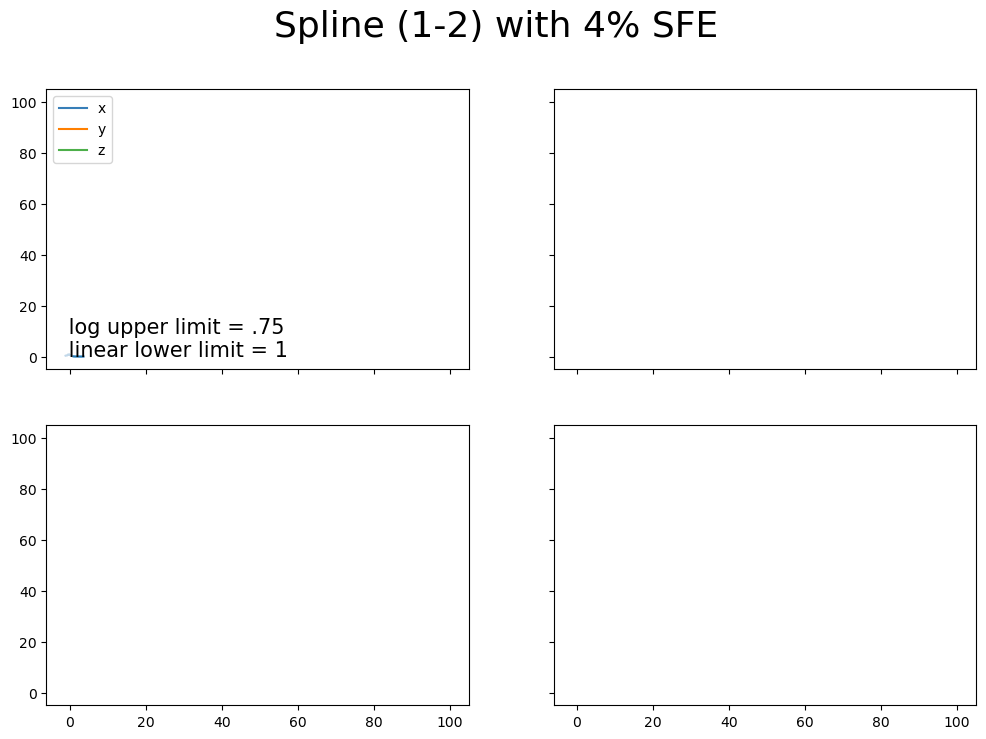

In [34]:
#linear and spline slope

start = time.time()
print('starting')
slopes = []
error = []
fig, ax = plt.subplots(nrows=2,ncols=2, sharex=True, sharey=True,figsize=(12,8))
ax =ax.ravel()
plt.suptitle('Spline (1-2) with ' + perc + '% SFE', size =26)
ax[0].annotate(' log upper limit = .75\n linear lower limit = 1',[-2,1e-5], size =15)

ax[0].plot(100,100, color = '#377eb8', alpha =1)
ax[0].plot(100,100, color = '#ff7f00', alpha =1)
ax[0].plot(100,100, color = '#4daf4a', alpha =1)
ax[0].legend([ 'x', 'y', 'z'])
b = 0

for n in range(4):
    den = plot_data[plot_data.files[n]]
    color_list = ('#377eb8', '#ff7f00', '#4daf4a')
    print(n)     #for time keeping
    
    for a in (range(3)):

        log_den_d = plot_data[plot_data.files[4+b]]
        counts_d, binS_d = np.histogram(log_den_d,bins=50, density= True)
        b = b+1
        
        bin_list = []
        for i in range(len(binS_d)-1):
            bin_i=(binS_d[i]+binS_d[i+1])/2
            bin_list.append(bin_i)
        #create subrange and plots linear fit
        x =[]
        y = []
        x_log =[]
        y_log = []
        for i in range(len(bin_list)):
            if bin_list[i] > slope_limit:
                if bin_list[i] < slope_max:
                        x.append(bin_list[i])
                        y.append(counts_d[i])
                else:
                    break
        for i in range(len(bin_list)):
            if bin_list[i] < sigma_limit:
                    x_log.append(bin_list[i])
                    y_log.append(counts_d[i])
            else:
                break
        
        lin_param, lin_con = scipy.optimize.curve_fit(linear, x, np.log(y))
        y = linear(np.array(x),lin_param[0],lin_param[1])
        print(lin_param[0])
        y_spline = linear(np.array(x), spline_slope[a+3*n],lin_param[1])
        log_param, log_con = scipy.optimize.curve_fit(lognorm, x_log, np.log(y_log))
        y_log = lognorm(np.array(x_log),log_param[0],log_param[1])
        
        slopes.append(lin_param[0])
        error.append(np.sqrt(np.diag(lin_con))[0])
        ax[n].plot(bin_list, counts_d, color = color_list[a], alpha = .3)
        #ax[n].plot(x,np.exp(y), color = color_list[a])
        ax[n].plot(x,np.exp(y_spline))

        #ax[n].plot(x_log,np.exp(y_log), color = color_list[a])

        
    if n > 1:
        ax[n].set_xlabel(r'ln($N/N_0$)', size=15)
    if n == 0 or n == 2:
        ax[n].set_ylabel(r'p(ln($N/N_0$))', size=15)
    


    ax[n].set_title(titles[n], size = 17)
    ax[n].set_yscale('log')
    ax[n].set_ylim(10**(-6),1)
    ax[n].set_xlim(-3,5)
    
plt.tight_layout()
plt.subplots_adjust(top=.85)
plt.savefig('slope_spline_lim,75_4lv_'+perc+'%', bbox_inches='tight')
plt.show()


end = time.time()
print("time:",(end-start)/60)

starting
0
1
2
3


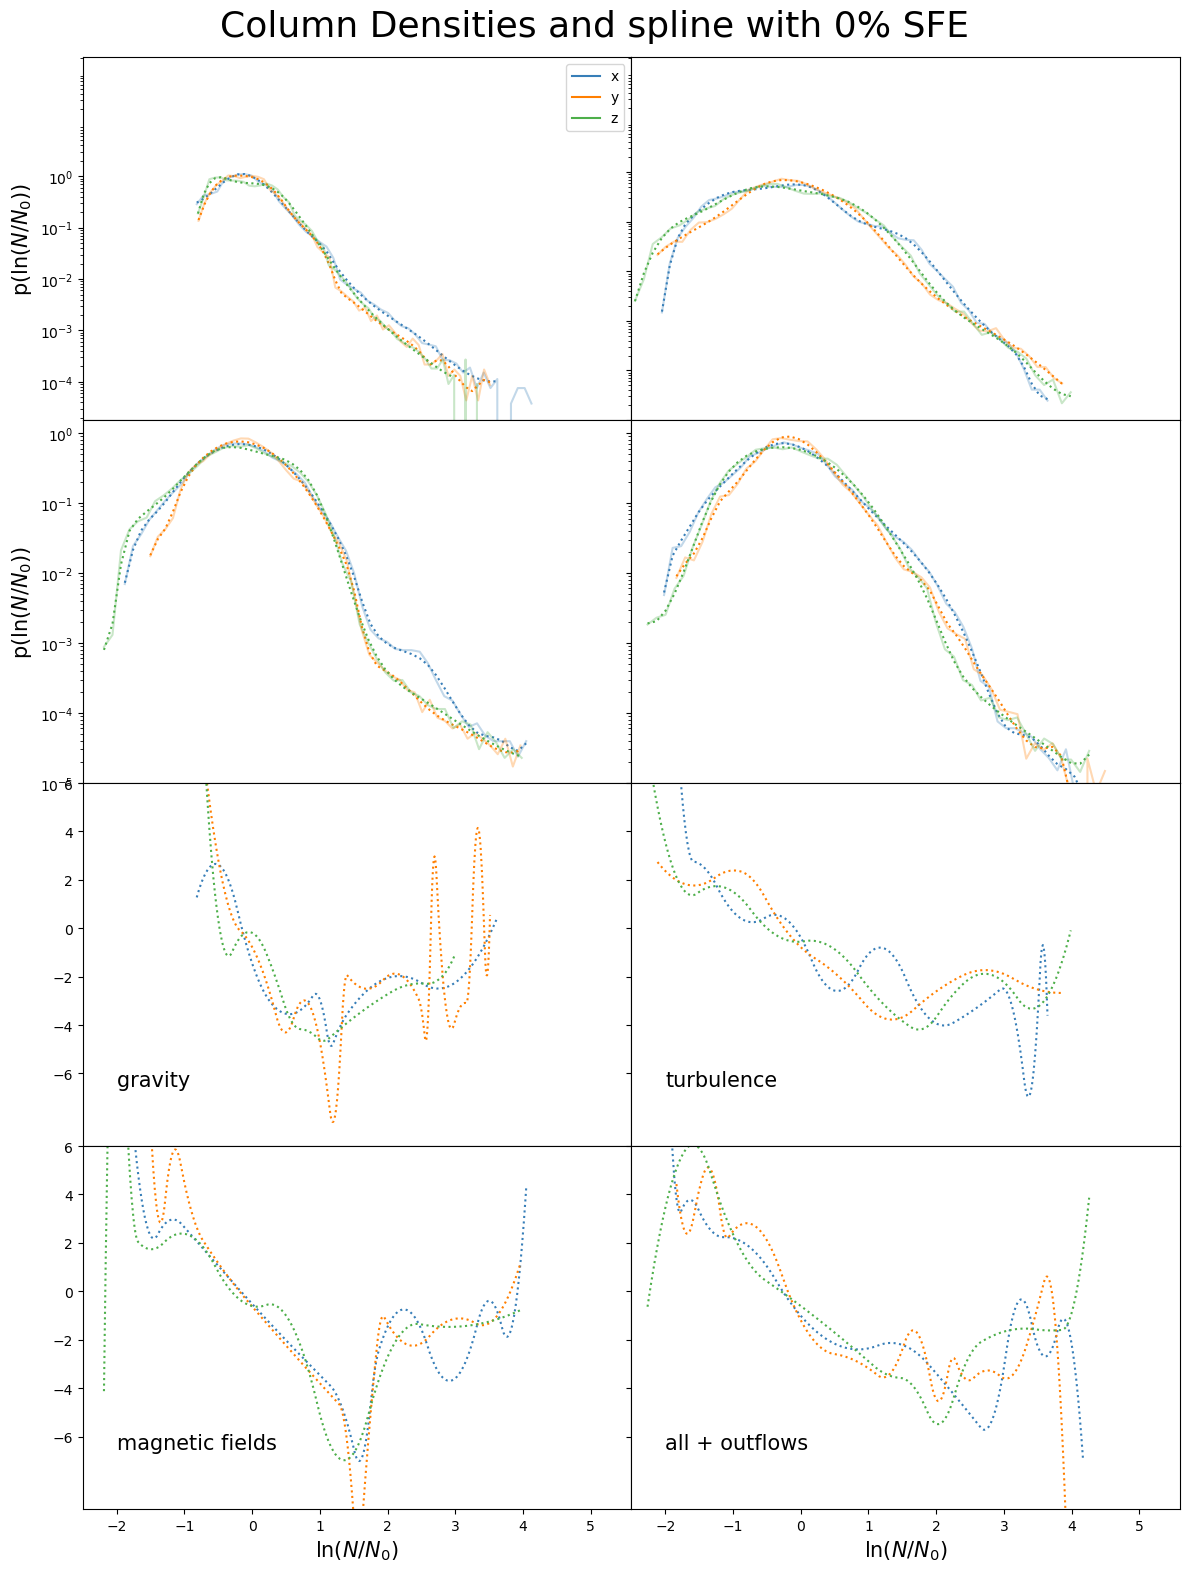

time: 1.207042968273163
starting
0
1
2
3


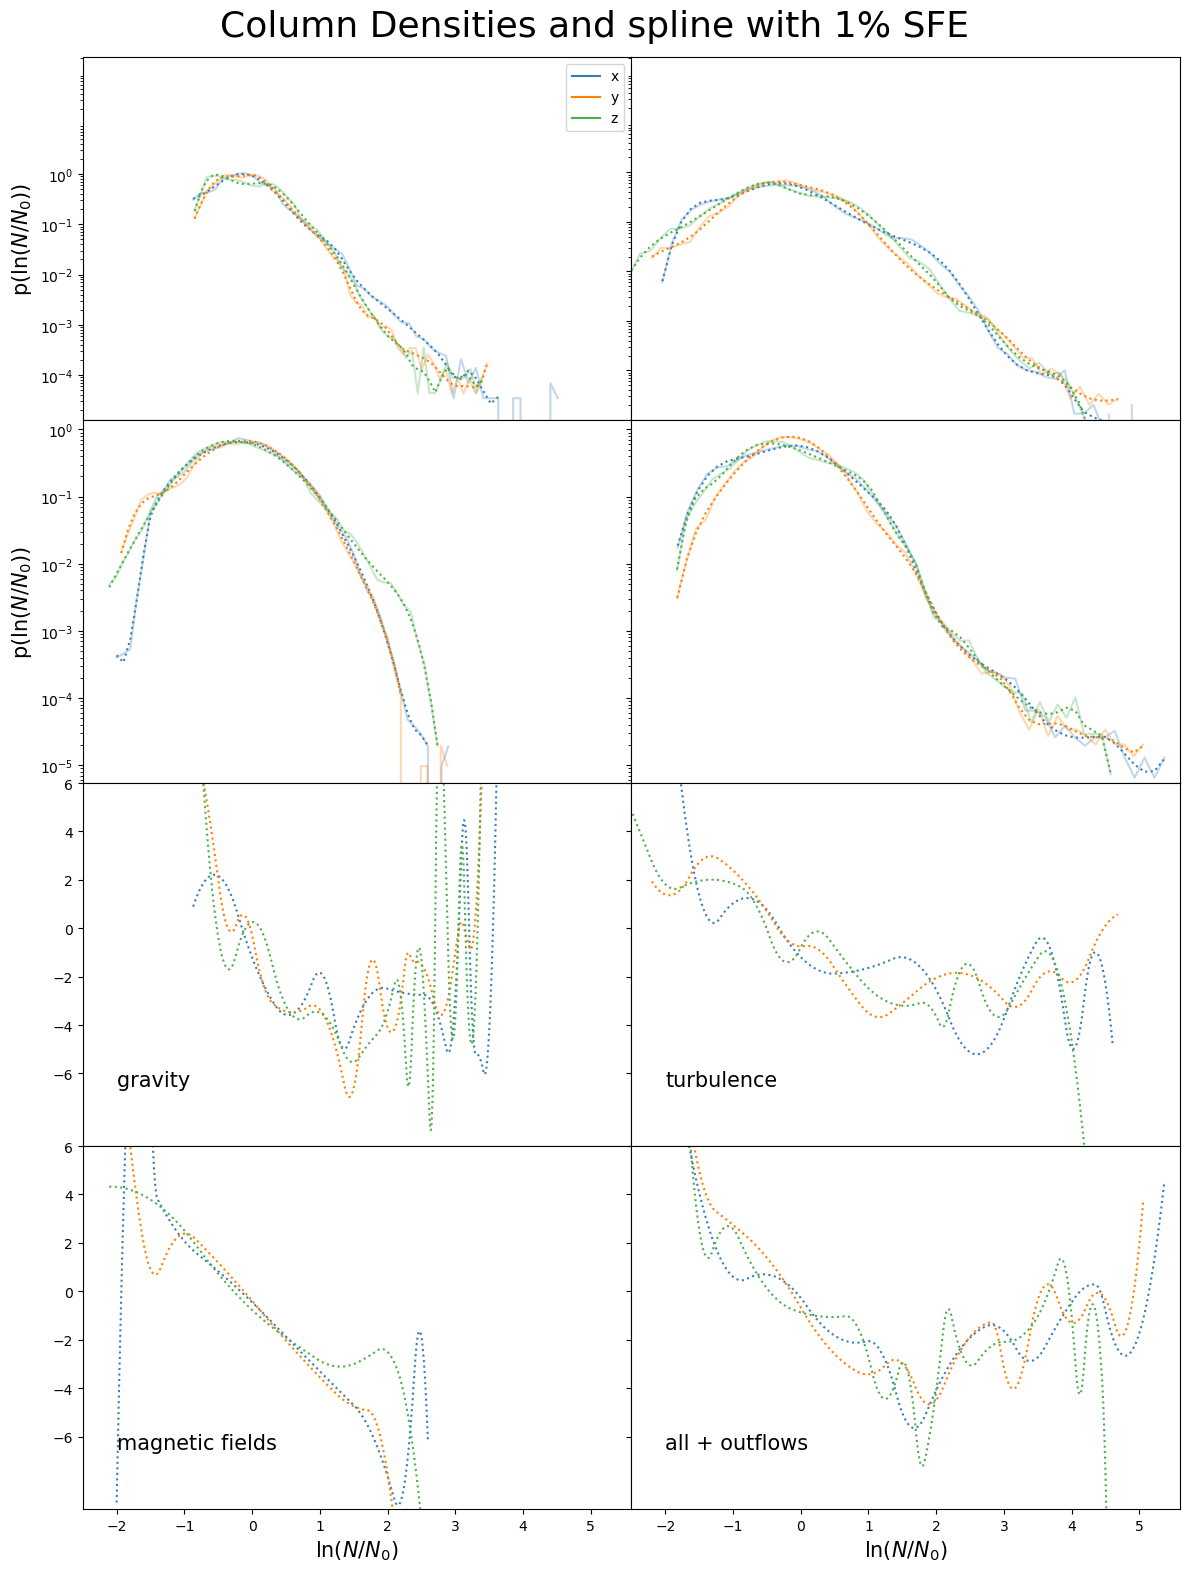

time: 0.9845443964004517
starting
0
1
2
3


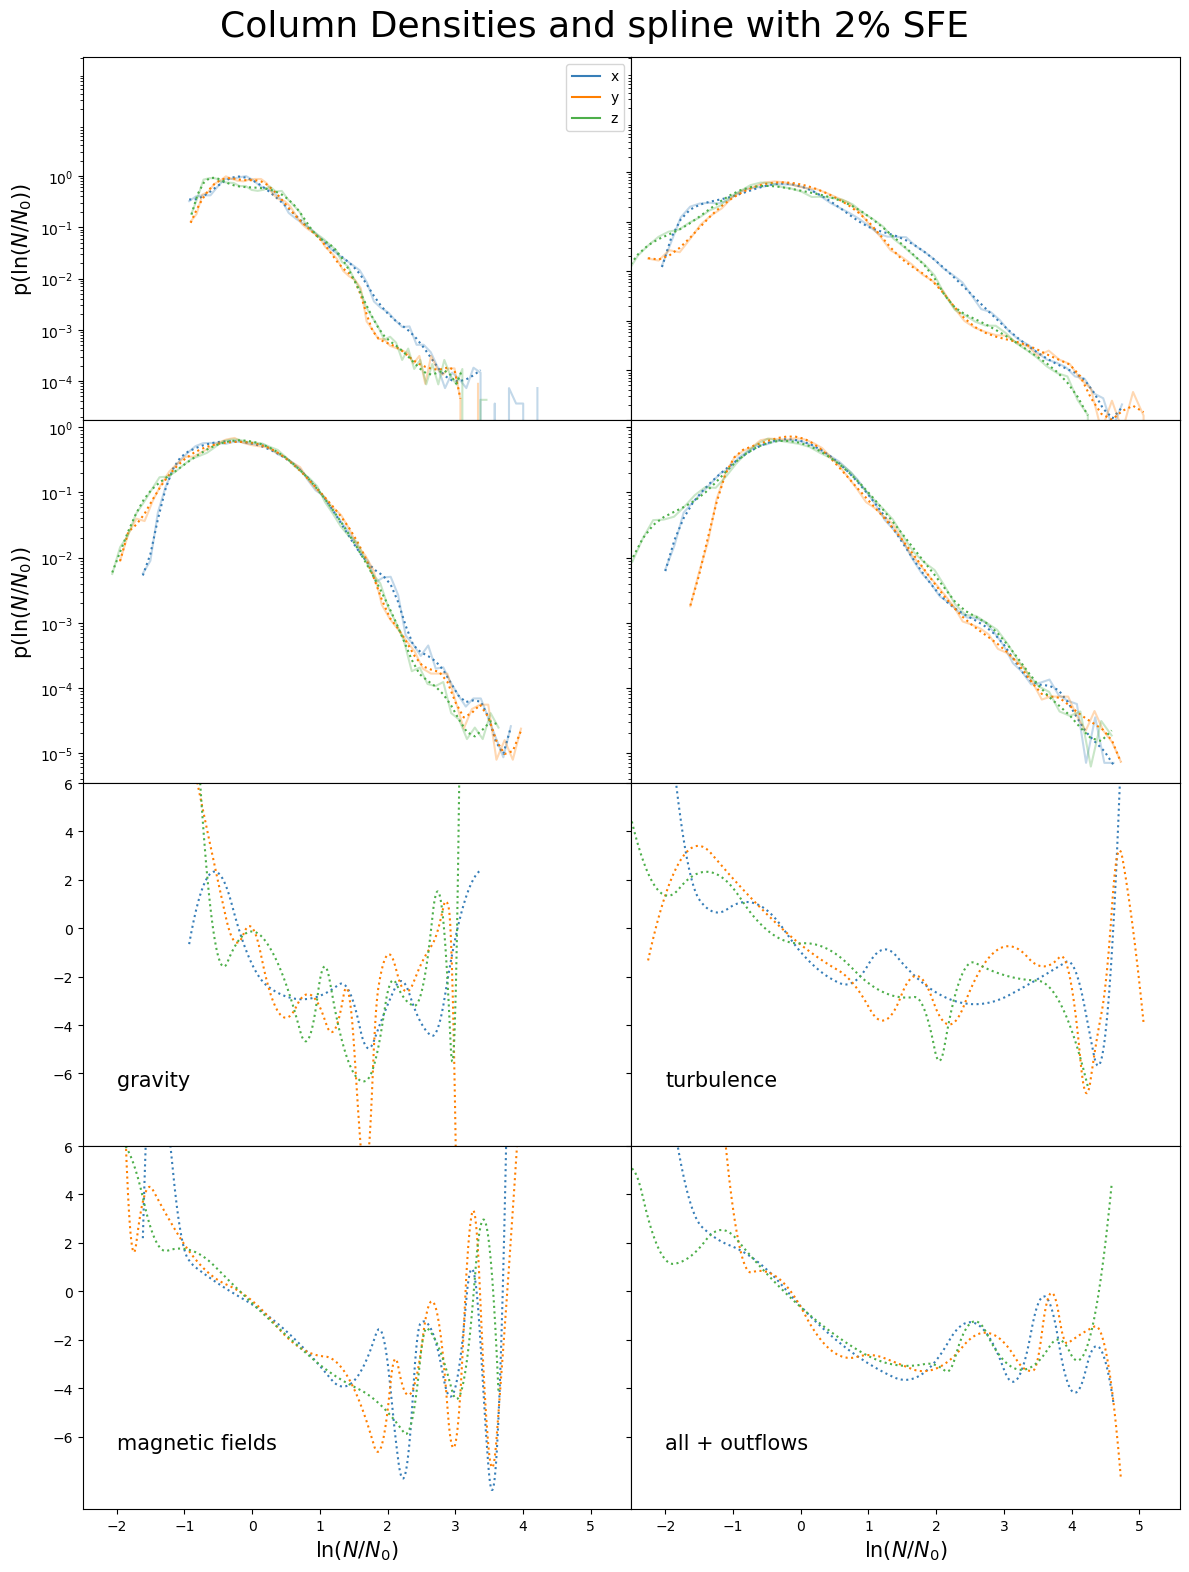

time: 1.0956137696901957
starting
0
1
2
3


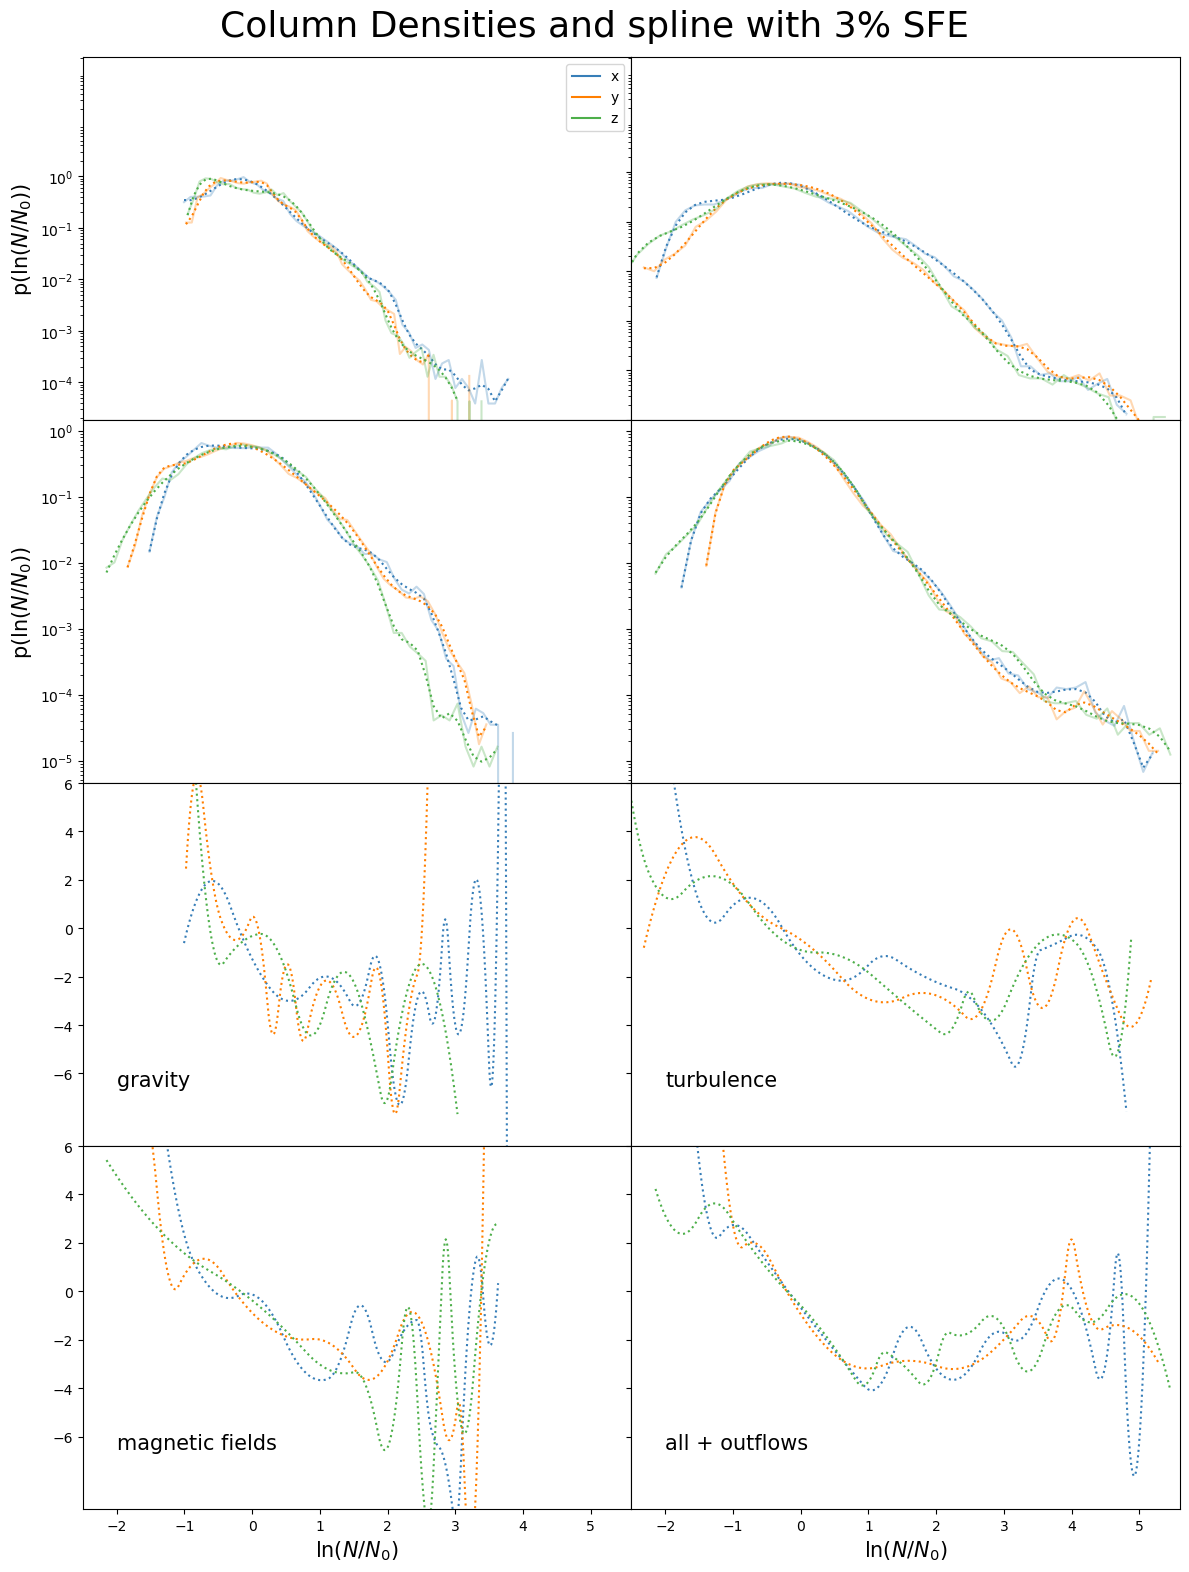

time: 1.1680824240048726
starting
0
1
2
3


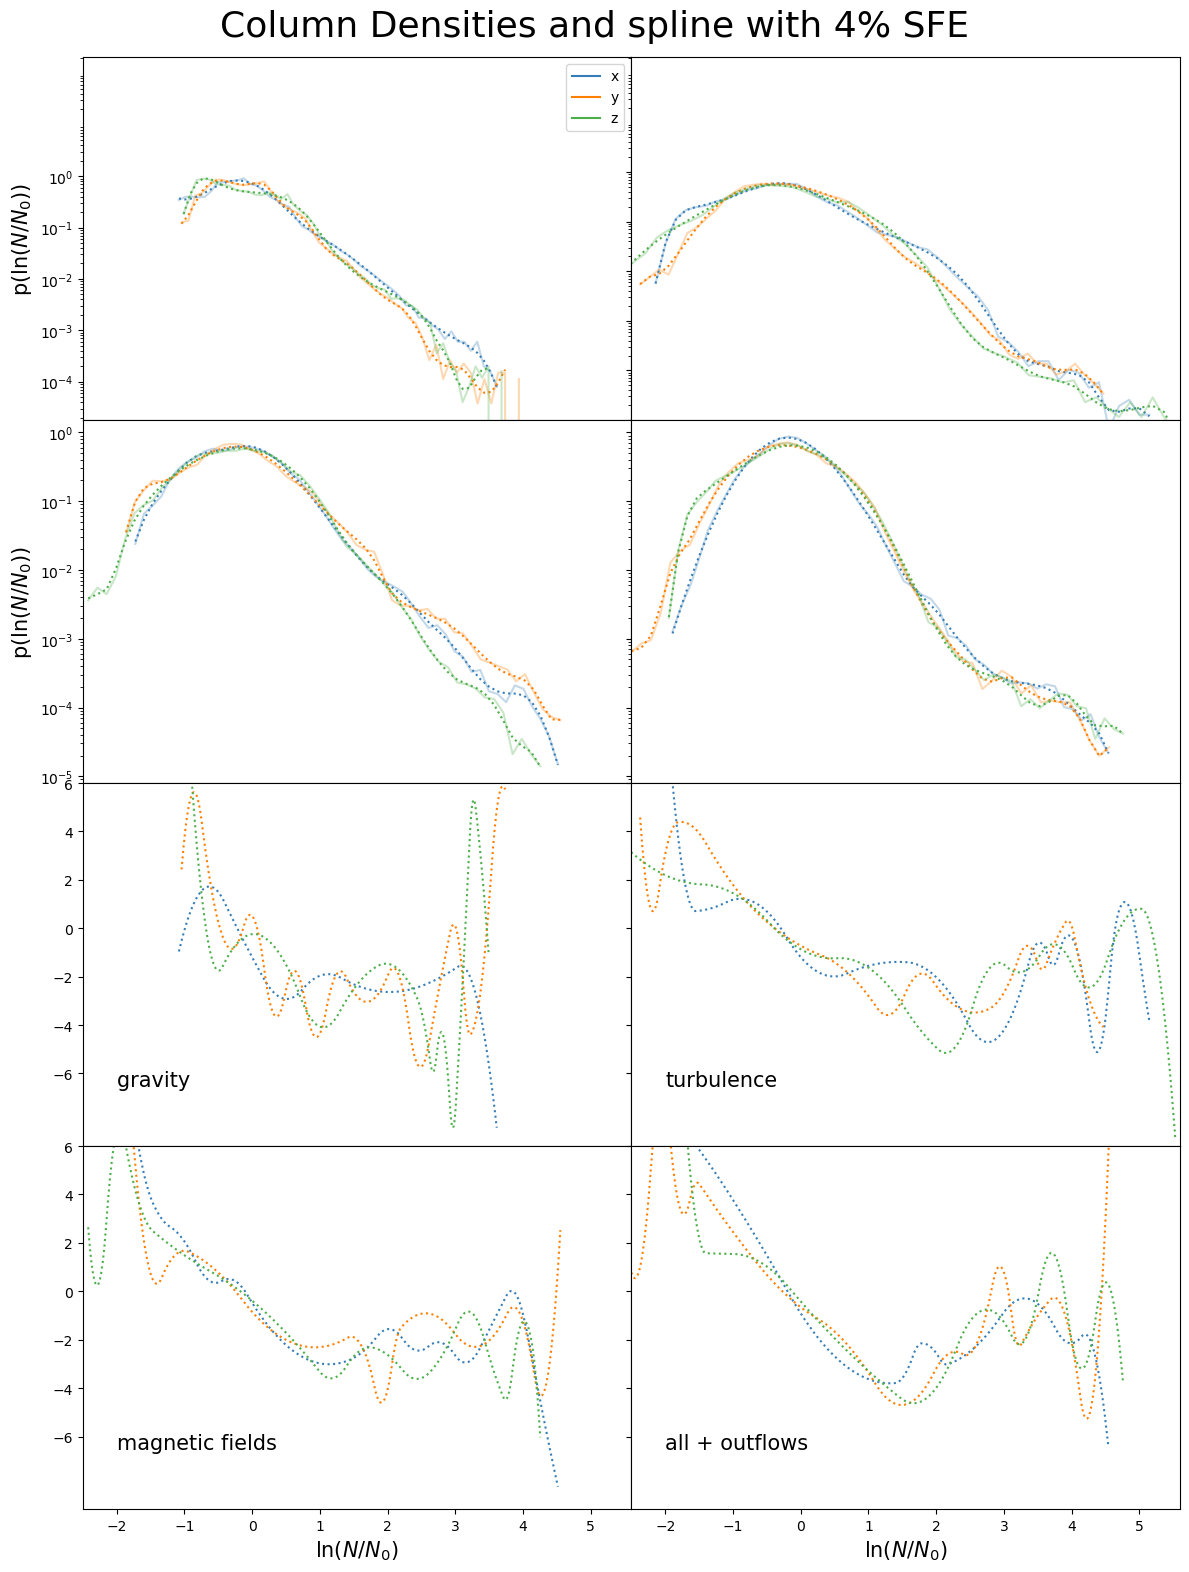

time: 0.9981222828229268
starting
0
1
2
3


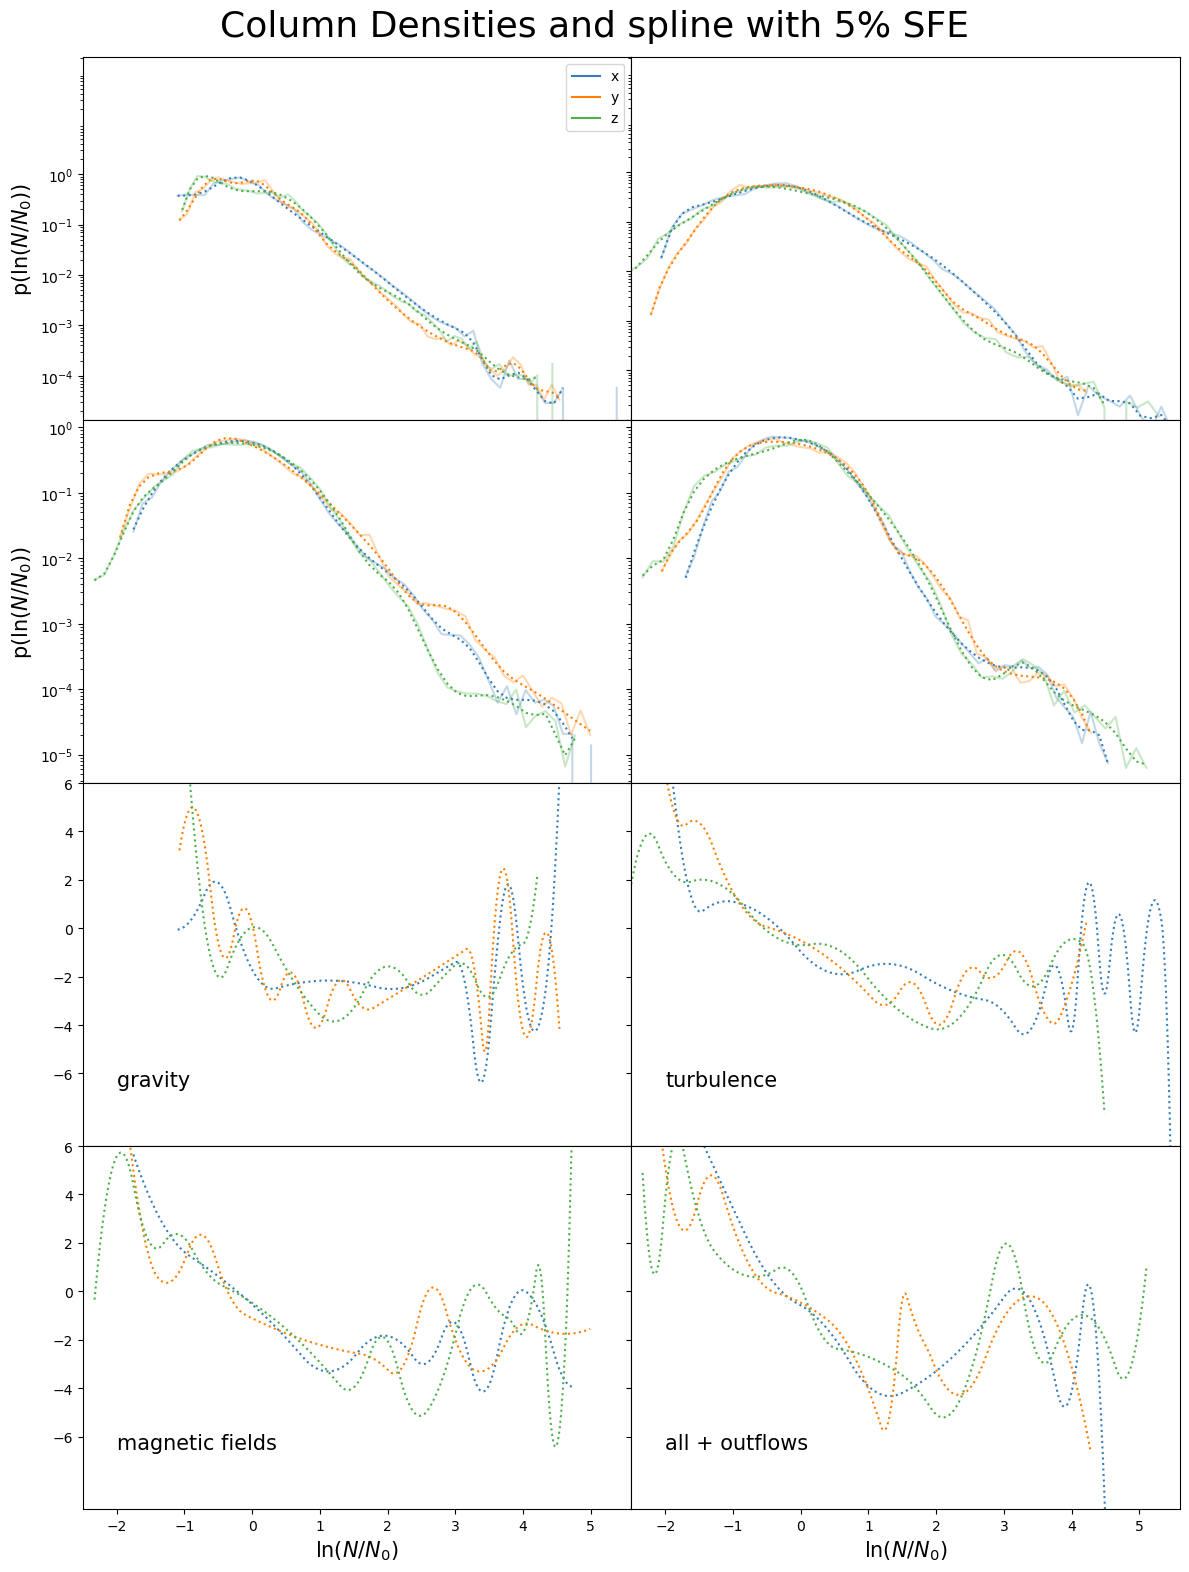

time: 1.095665967464447


In [11]:
#super cell for all %
pp = ['0','1','2','3','4','5']
for p in range(6):
    #only cell in need of changing between runs
    inputfile = ('/scratch/jak491/npz_storage/covering_grid_den0.npz','/scratch/jak491/npz_storage/covering_grid_den1.npz','/scratch/jak491/npz_storage/covering_grid_den2.npz', '/scratch/jak491/npz_storage/covering_grid_den3.npz', '/scratch/jak491/npz_storage/covering_grid_den4.npz', '/scratch/jak491/npz_storage/covering_grid_den5.npz', '/scratch/jak491/npz_storage/covering_grid_den_high.npz')
    percent = p
    perc = pp[p]
    titles = ('gravity ', 'turbulence','magnetic fields', 'all + outflows')
    #titles = ('10% SFE\nG','10% SFE\nG+T','10% SFE\nG+T+M','6% SFE\nG+T+M+P' )

    #plot setup
    d = {}
    variable_name =('density_g','density_gt','density_gtm', 'density_gtmp')
    input_file = inputfile[percent]
    plot_data = np.load(input_file, allow_pickle=True)

    #main processing cell.
    warnings.filterwarnings('ignore')


    start = time.time()
    print('starting')
    spline_slope = []
    slopes = []
    error = []
    color_list = ('#377eb8', '#ff7f00', '#4daf4a')#('b', 'r', 'green')
    fig, ax = plt.subplots(nrows=4,ncols=2,figsize=(12,16), sharex = 'all', sharey = 'row', gridspec_kw={'hspace': 0,'wspace':0})
    ax =ax.ravel()
    plt.suptitle('Column Densities and spline with ' + perc + '% SFE', size =26)
    b = 0
    ax[0].plot(100,100, color = color_list[0], alpha =1)
    ax[0].plot(100,100, color = color_list[1], alpha =1)
    ax[0].plot(100,100, color = color_list[2], alpha =1)

    legend1 = ax[0].legend([ 'x', 'y', 'z'], loc = 'upper right')

    #leg4 =ax[0].plot(100,100, color = 'black', alpha =.3)
    #leg5 =ax[0].plot(100,100, color = 'black', alpha =1, linestyle = ':')
    #legend2 = ax[0].legend([leg4,leg5],['column density','spline fit'], loc = 'lower right')
    #ax[0].add_artist(legend1)

    for n in range(4):
        den = plot_data[plot_data.files[n]]
        color_list = ('#377eb8', '#ff7f00', '#4daf4a')#('b', 'r', 'green')
        print(n)     #for time keeping

        for a in (range(3)):
            xx =[]
            y = []
            spline = []

            log_den_d = plot_data[plot_data.files[4+b]]
            counts_d, binS_d = np.histogram(log_den_d,bins=50, density= True)
            b = b+1

            bin_list = []
            for i in range(len(binS_d)-1):
                bin_i=(binS_d[i]+binS_d[i+1])/2
                bin_list.append(bin_i)

            for i in range(len(bin_list)):

                if counts_d[i] > 0:
                        xx.append(bin_list[i])
                        y.append(counts_d[i])
                else:
                    break
            x = np.linspace(min(xx), max(xx), 500)
            counts_filtered = savgol_filter(np.log(y), 5, 3)

            spl = UnivariateSpline(xx, counts_filtered, k = 3, s = .3)
            pdf_density_fit = x
            pdf_counts_fit = np.exp(spl(x))
            ax[n].plot(bin_list, counts_d, color = color_list[a], alpha = .3)
            ax[n].plot(xx, np.exp(spl(xx)), label = 'fit', color =color_list[a], linestyle = ':')

            deriv = spl.derivative(1)
            pdf_counts_deriv = deriv(x)
            ax[n+4].plot(x, deriv(x), label = 'fit',color =color_list[a], linestyle = ':')

            #recording spline slope
            z=0
            for zz in x:
                if zz > 1:
                    if zz < 2:
                        spline.append(pdf_counts_deriv[z])
                z = z+1
            spline_slope.append(sum(spline)/len(spline))



        if n > 1:
            ax[n+4].set_xlabel(r'ln($N/N_0$)', size=15)
        if n == 0 or n == 2:
            ax[n].set_ylabel(r'p(ln($N/N_0$))', size=15)

      #  if n == 0 or n == 2:
      #     ax[n+4].set_ylabel(r'p(ln($N/N_0$))', size=15)


        ax[n].annotate(titles[n],[-2,10**(-5.5)], size =15)
        ax[n+4].annotate(titles[n],[-2,-6.5], size =15)
        ax[n].set_yscale('log')
        #ax[n].set_ylim(10**(-6),1)
        #ax[n].set_xlim(-3,6)
        ax[n].set_yticks((1e0,1e-1,1e-2,1e-3,1e-4,1e-5))
        ax[n+4].set_yscale('linear')
        ax[n+4].set_ylim(-9,6)
        ax[n+4].set_xlim(-2.5,5.6)
        ax[n+4].set_yticks((6,4,2,0,-2,-4,-6))

    plt.tight_layout()
    plt.subplots_adjust(top=.95)
    plt.savefig('spline_4lv_'+perc+'%', bbox_inches='tight')
    plt.show()

    file = open("txt_file_storage/spline_slope" +perc+"%.txt", "w")
    str_dictionary = repr(spline_slope)
    file.write(str_dictionary + "\n")
    #str_dictionary = repr(slopes_error)
    #file.write(str_dictionary + "\n")
    file.close()

    end = time.time()
    print("time:",(end-start)/60)

In [2]:
pp = ['0','1','2','3','4','5']
p = pp[1]

In [3]:
p

'1'